In [0]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes_df = pd.read_csv(uri_filmes)
filmes_df.columns = ['id_filme', 'titulo', 'generos']
filmes_df.head()

,id_filme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos_df = filmes_df.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes_df, generos_df], axis=1)
dados_dos_filmes.head()


,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos_df)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [0]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')


Grupos [2 2 1 ... 1 2 1]


In [0]:
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)

In [0]:
print(generos_df.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.34443011 -0.27144974 -0.23524466 -0.26177995 -0.56224645
   0.92116332 -0.21328016  0.1061589  -0.16428849  0.29531782  0.43675484
  -0.07303529 -0.17640903  0.67695946 -0.31627997  0.07241632  1.43369349
  -0.12320804 -0.04115187]
 [ 0.03718158 -0.3196422  -0.29638571 -0.2200747  -0.18224451  0.24905694
  -0.27491431  0.13342489  0.10242285 -0.18142594 -0.08959578 -0.10824969
  -0.11251862  0.02284971 -0.2201504   0.18958695 -0.19496239 -0.48661325
   0.06061937  0.02889227]
 [-0.05917995  0.76435296  1.62770407  1.26101069  1.14841702 -0.13846894
  -0.31462227 -0.21094231 -0.58170462  0.993449   -0.09492563 -0.23904634
   0.57124651  0.18145075 -0.1575278  -0.27916393  0.6803341  -0.25077064
 

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns = generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.344430,-0.271450,-0.235245,-0.261780,-0.562246,0.921163,-0.213280,0.106159,-0.164288,0.295318,0.436755,-0.073035,-0.176409,0.676959,-0.316280,0.072416,1.433693,-0.123208,-0.041152
1,0.037182,-0.319642,-0.296386,-0.220075,-0.182245,0.249057,-0.274914,0.133425,0.102423,-0.181426,-0.089596,-0.108250,-0.112519,0.022850,-0.220150,0.189587,-0.194962,-0.486613,0.060619,0.028892
2,-0.059180,0.764353,1.627704,1.261011,1.148417,-0.138469,-0.314622,-0.210942,-0.581705,0.993449,-0.094926,-0.239046,0.571247,0.181451,-0.157528,-0.279164,0.680334,-0.250771,-0.054919,-0.053506


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b05d98278>,
      dtype=object)

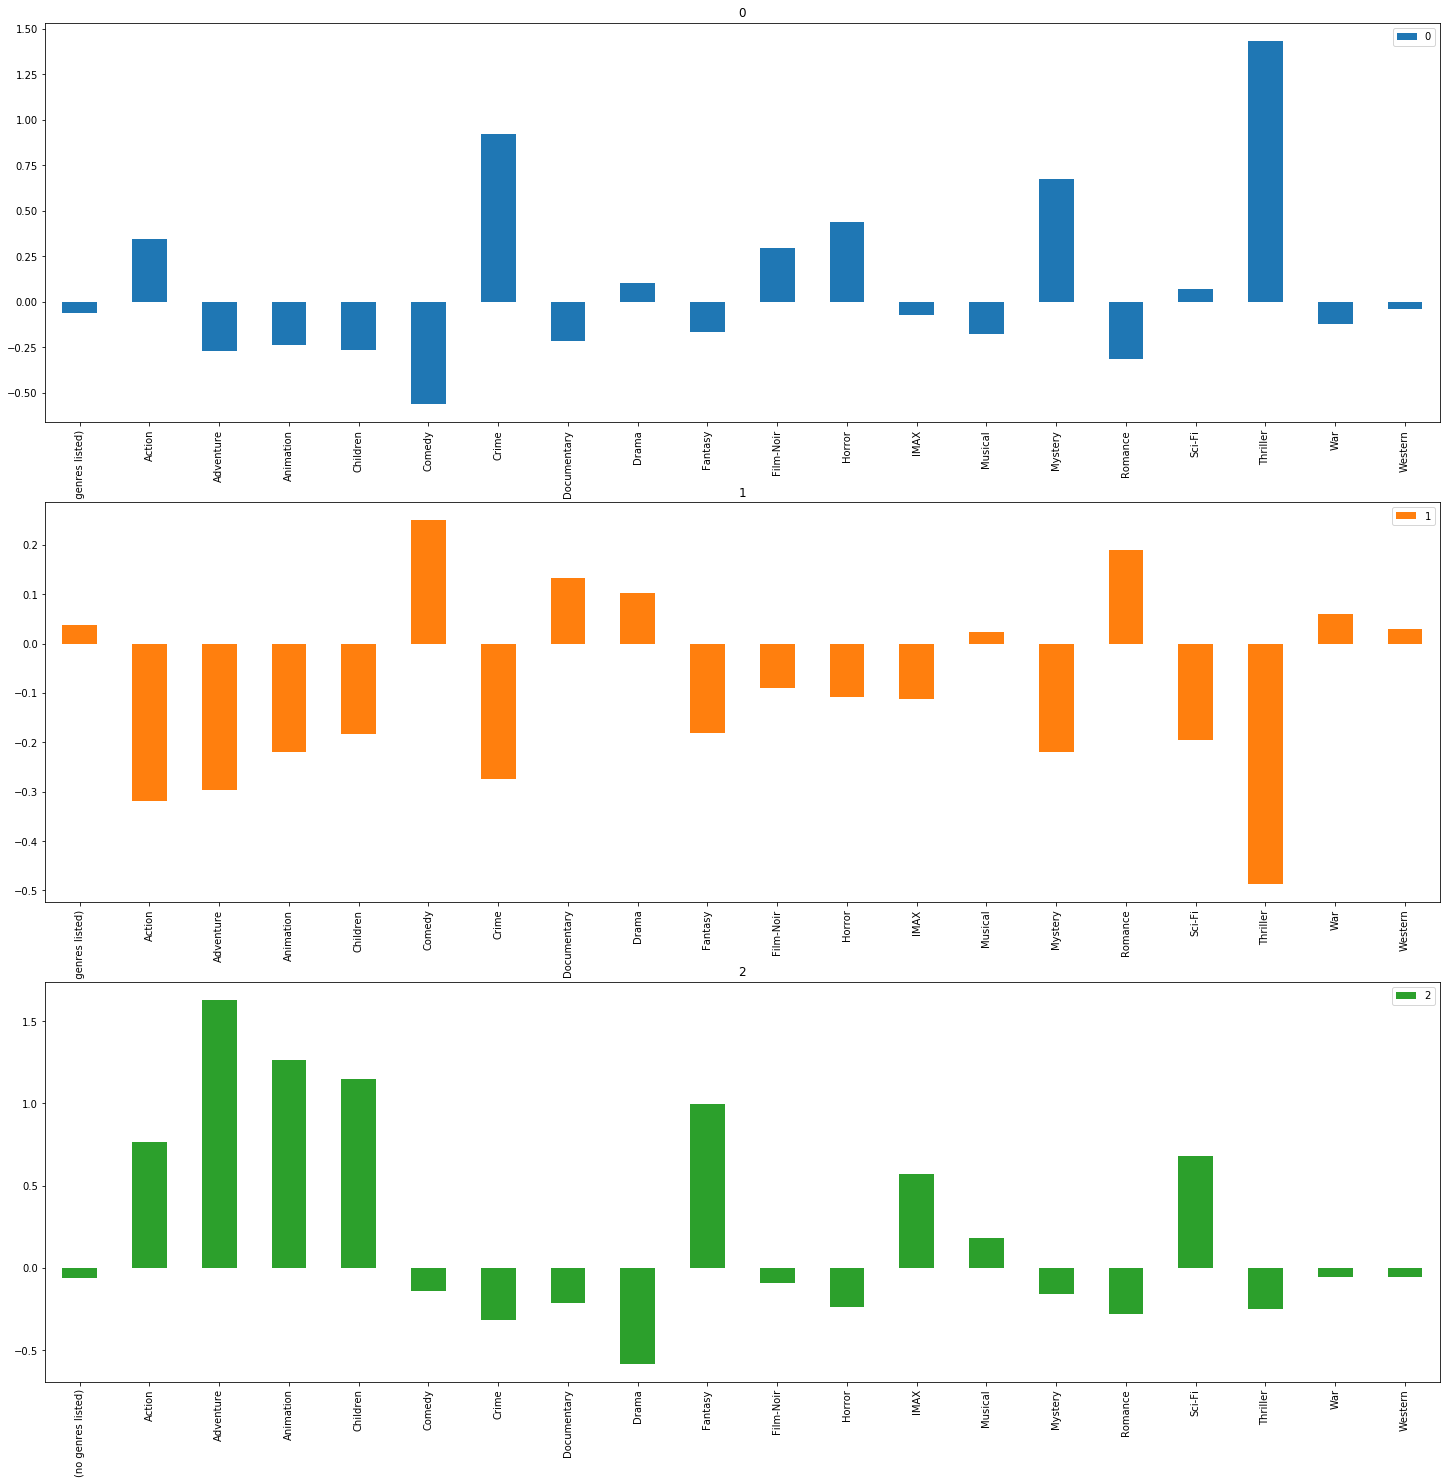

In [0]:
grupos.transpose().plot.bar(subplots = True,
               figsize=(25, 25),
                sharex=False)

In [0]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6327,48738,"Last King of Scotland, The (2006)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9357,161582,Hell or High Water (2016),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
661,866,Bound (1996),Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4338,6337,Owning Mahowny (2003),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3043,4077,"With a Friend Like Harry... (Harry, un ami qui...",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7258,74458,Shutter Island (2010),Drama|Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
88,100,City Hall (1996),Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6874,62792,Pride and Glory (2008),Crime|Drama,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8909,135288,Mr. Holmes (2015),Drama|Mystery,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3141,4226,Memento (2000),Mystery|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-25.495062 ,  64.19381  ],
       [ 66.09143  ,   7.2071176],
       [ 18.27033  , -12.852457 ],
       ...,
       [  9.928407 ,  11.869505 ],
       [-37.534206 ,  47.009182 ],
       [-19.023872 , -13.817472 ]], dtype=float32)

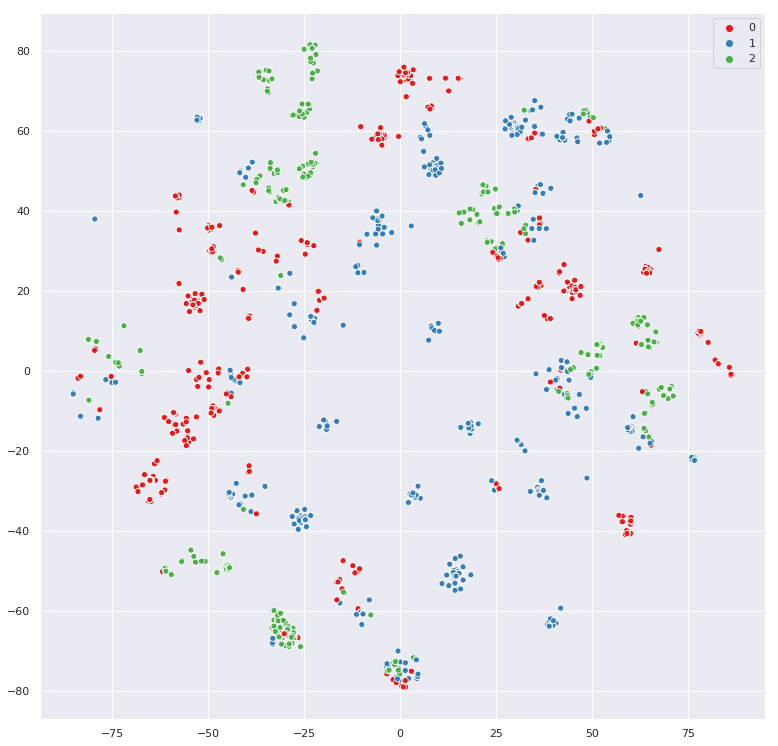

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13, 13)})

sns.scatterplot(x=visualizacao[:,0],
               y=visualizacao[:,1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b042a7128>,
      dtype=object)

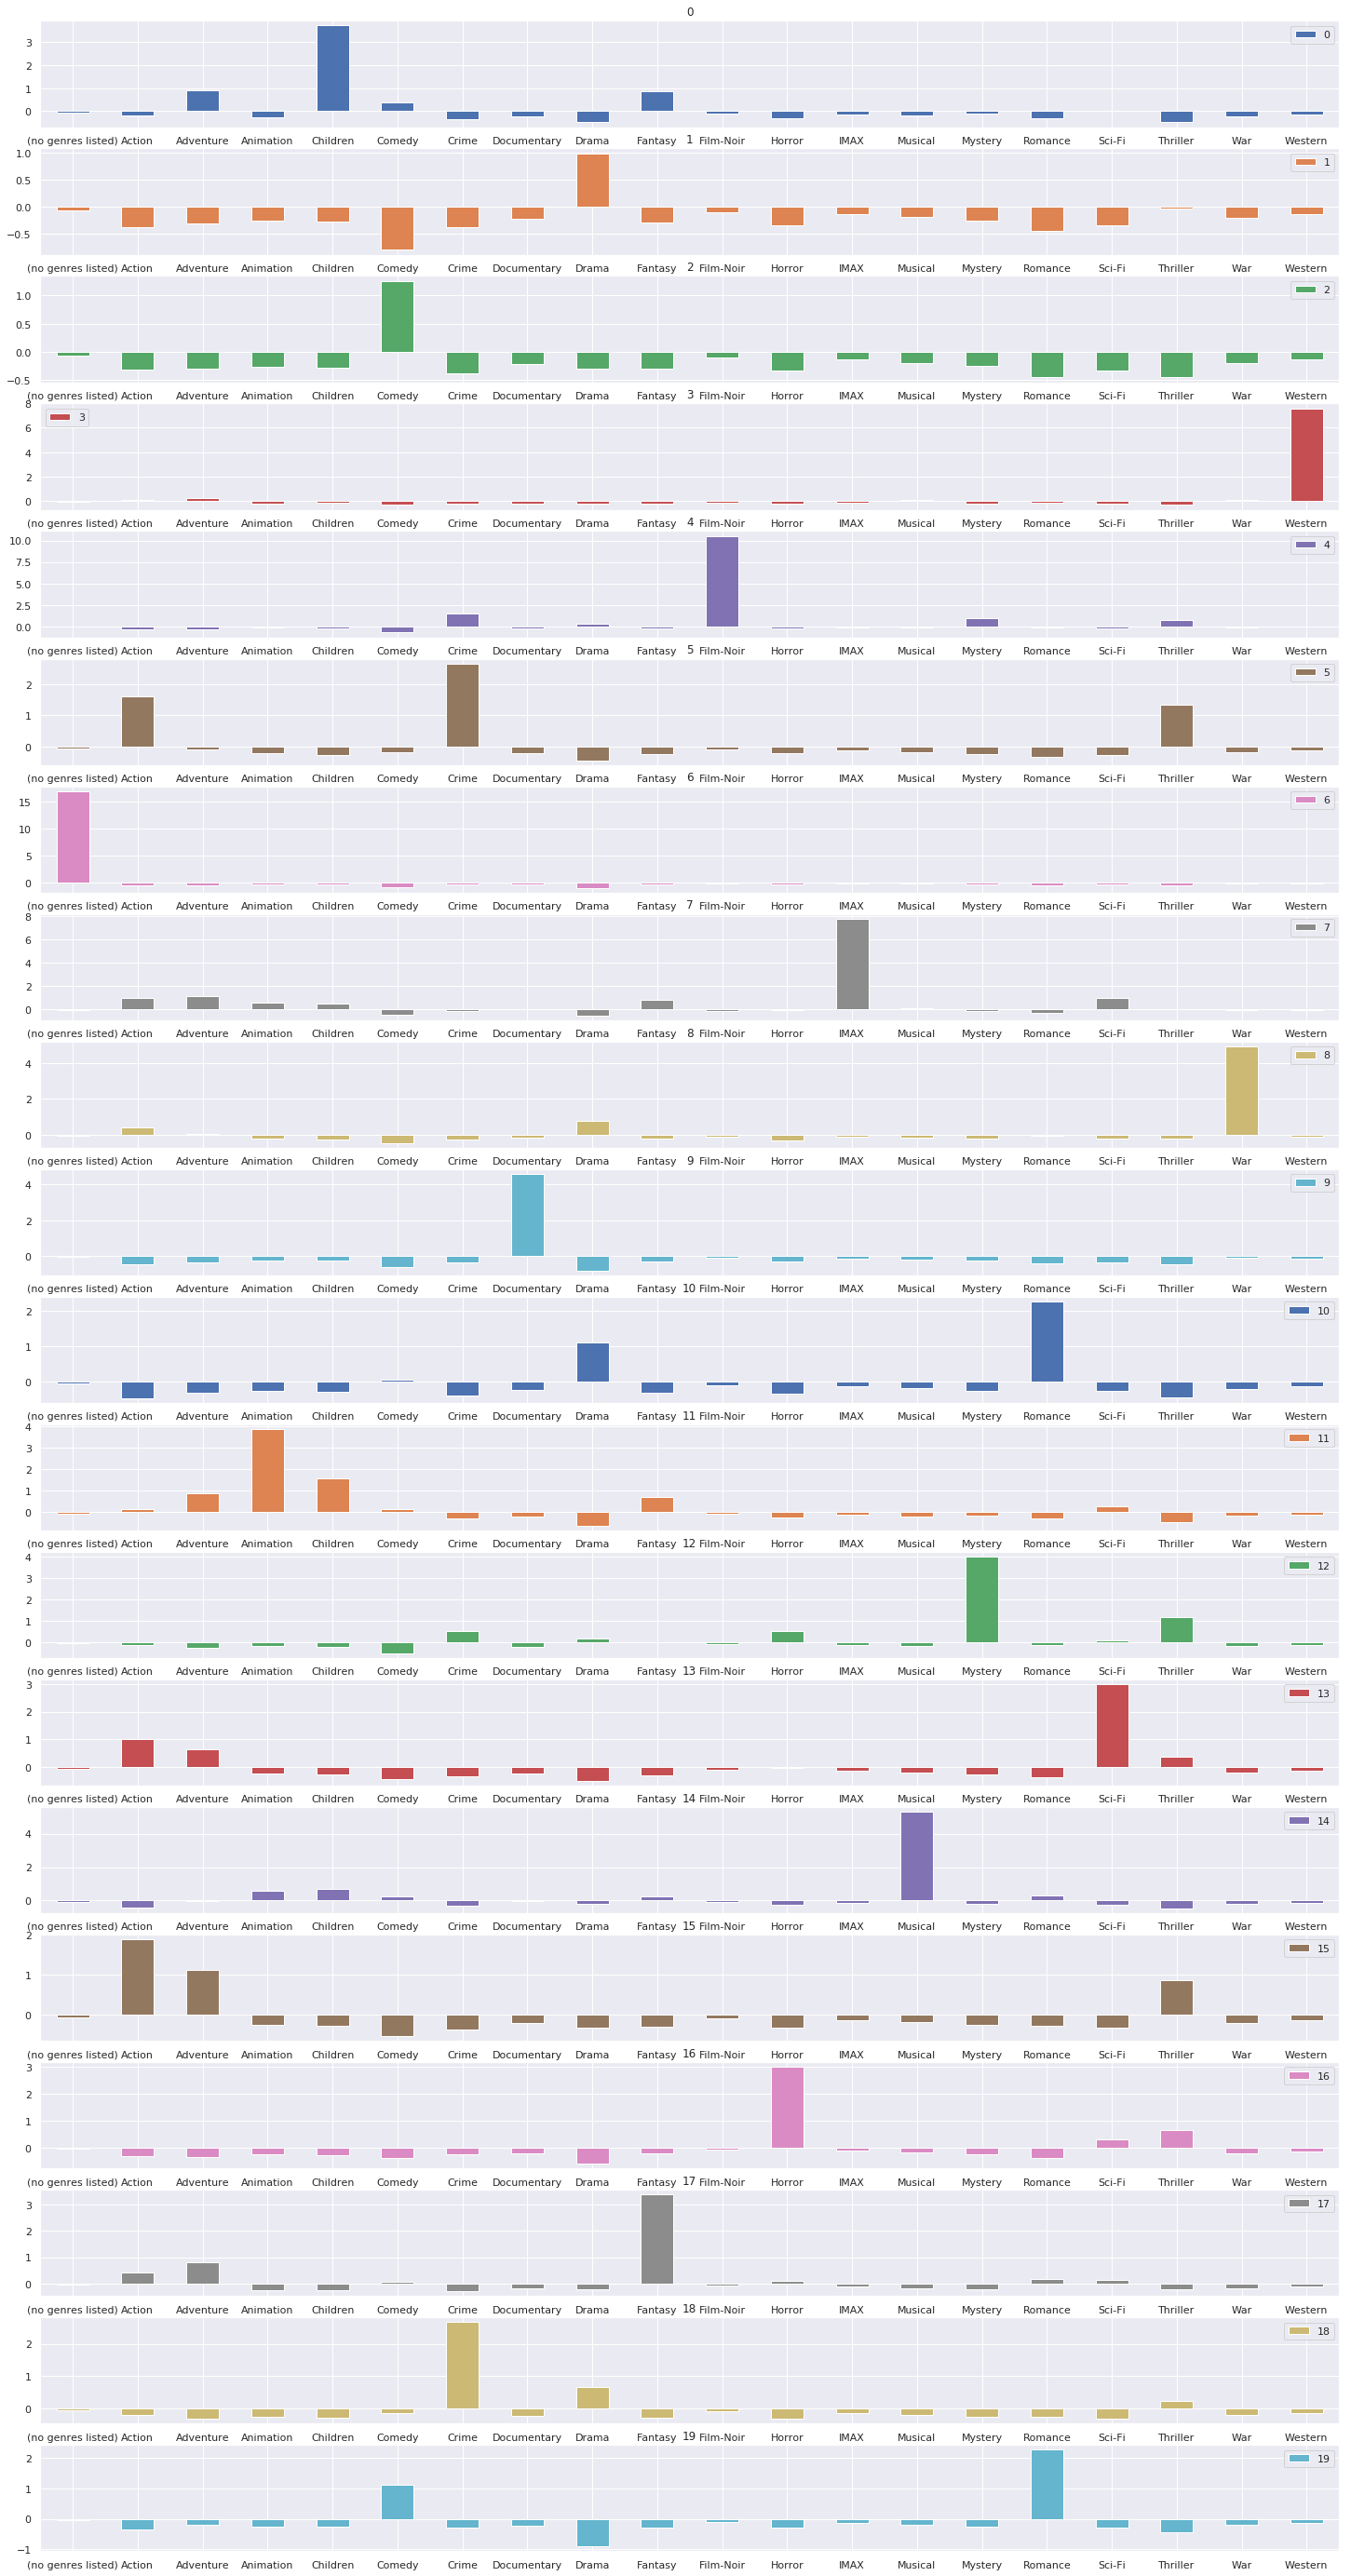

In [0]:
modeloKMeans = KMeans(n_clusters=20)

modeloKMeans.fit(generos_escalados)

gruposKMeans = pd.DataFrame(modeloKMeans.cluster_centers_,
            columns=generos_df.columns)

gruposKMeans.transpose().plot.bar(subplots=True,
                                 figsize=(25, 50),
                                 sharex=False,
                                 rot=0)

In [0]:
grupo = 2
filtro = modeloKMeans.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1830,2431,Patch Adams (1998),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6283,47736,"Chump at Oxford, A (1940)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5529,26567,Club Paradise (1986),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3140,4225,"Dish, The (2001)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9650,180231,Daddy's Home 2 (2017),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2040,2718,Drop Dead Gorgeous (1999),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1115,1454,SubUrbia (1997),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7669,88954,"Very Harold & Kumar 3D Christmas, A (2011)",Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4950,7460,Coffee and Cigarettes (2003),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2199,2924,Drunken Master (Jui kuen) (1978),Action|Comedy,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo= KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_escalados)

[20, 54583.14650278945]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179909.54996425138],
 [3, 166148.31228244578],
 [4, 156951.9592337941],
 [5, 147877.14674400486],
 [6, 136959.1871479822],
 [7, 128371.14660245713],
 [8, 119169.61370331184],
 [9, 109298.41788718745],
 [10, 103926.00083857053],
 [11, 94972.62502276342],
 [12, 88711.28791814648],
 [13, 79725.09922464295],
 [14, 74883.84122660065],
 [15, 69675.67351590062],
 [16, 64269.36908026699],
 [17, 60309.69760444732],
 [18, 60145.34833086376],
 [19, 56546.95031062527],
 [20, 55466.811124450294],
 [21, 53971.44080412224],
 [22, 51848.00458451751],
 [23, 50544.35399089391],
 [24, 48965.262430488525],
 [25, 48216.97612082915],
 [26, 46200.91850498937],
 [27, 45779.731195854816],
 [28, 44217.84800081827],
 [29, 43440.569181603896],
 [30, 43140.84438953904],
 [31, 41660.68597089374],
 [32, 40297.42994605856],
 [33, 40641.74175405539],
 [34, 39341.191734932305],
 [35, 38739.158766459805],
 [36, 37669.638419165436],
 [37, 36898.15893351557],
 [38, 36585.964804211966],
 [39, 35779.478

In [0]:
resultado = pd.DataFrame(resultado, columns=['grupos','inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179909.549964
2,3,166148.312282
3,4,156951.959234
4,5,147877.146744
5,6,136959.187148
6,7,128371.146602
7,8,119169.613703
8,9,109298.417887
9,10,103926.000839


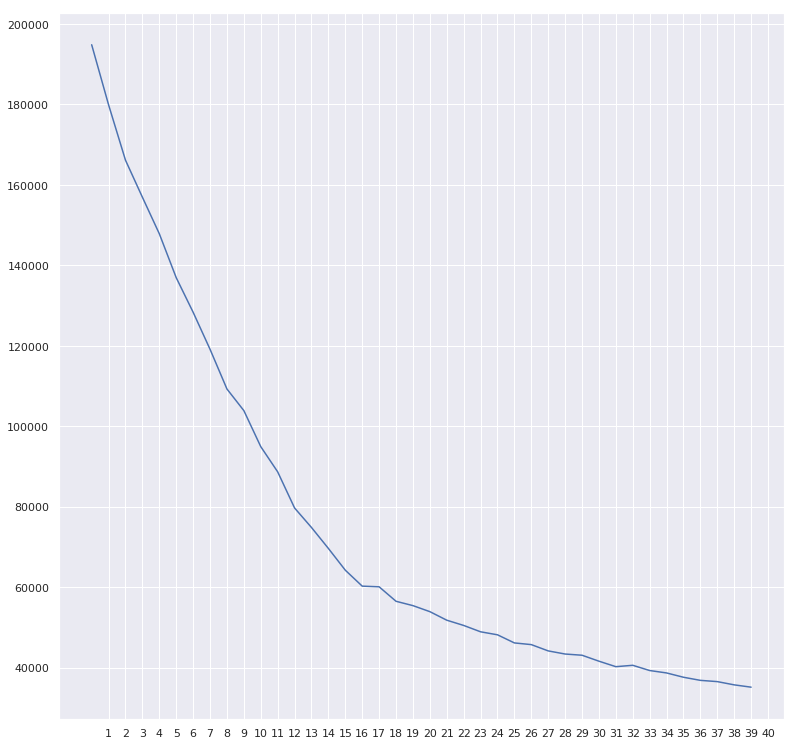

In [0]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b035f6cc0>,
      dtype=object)

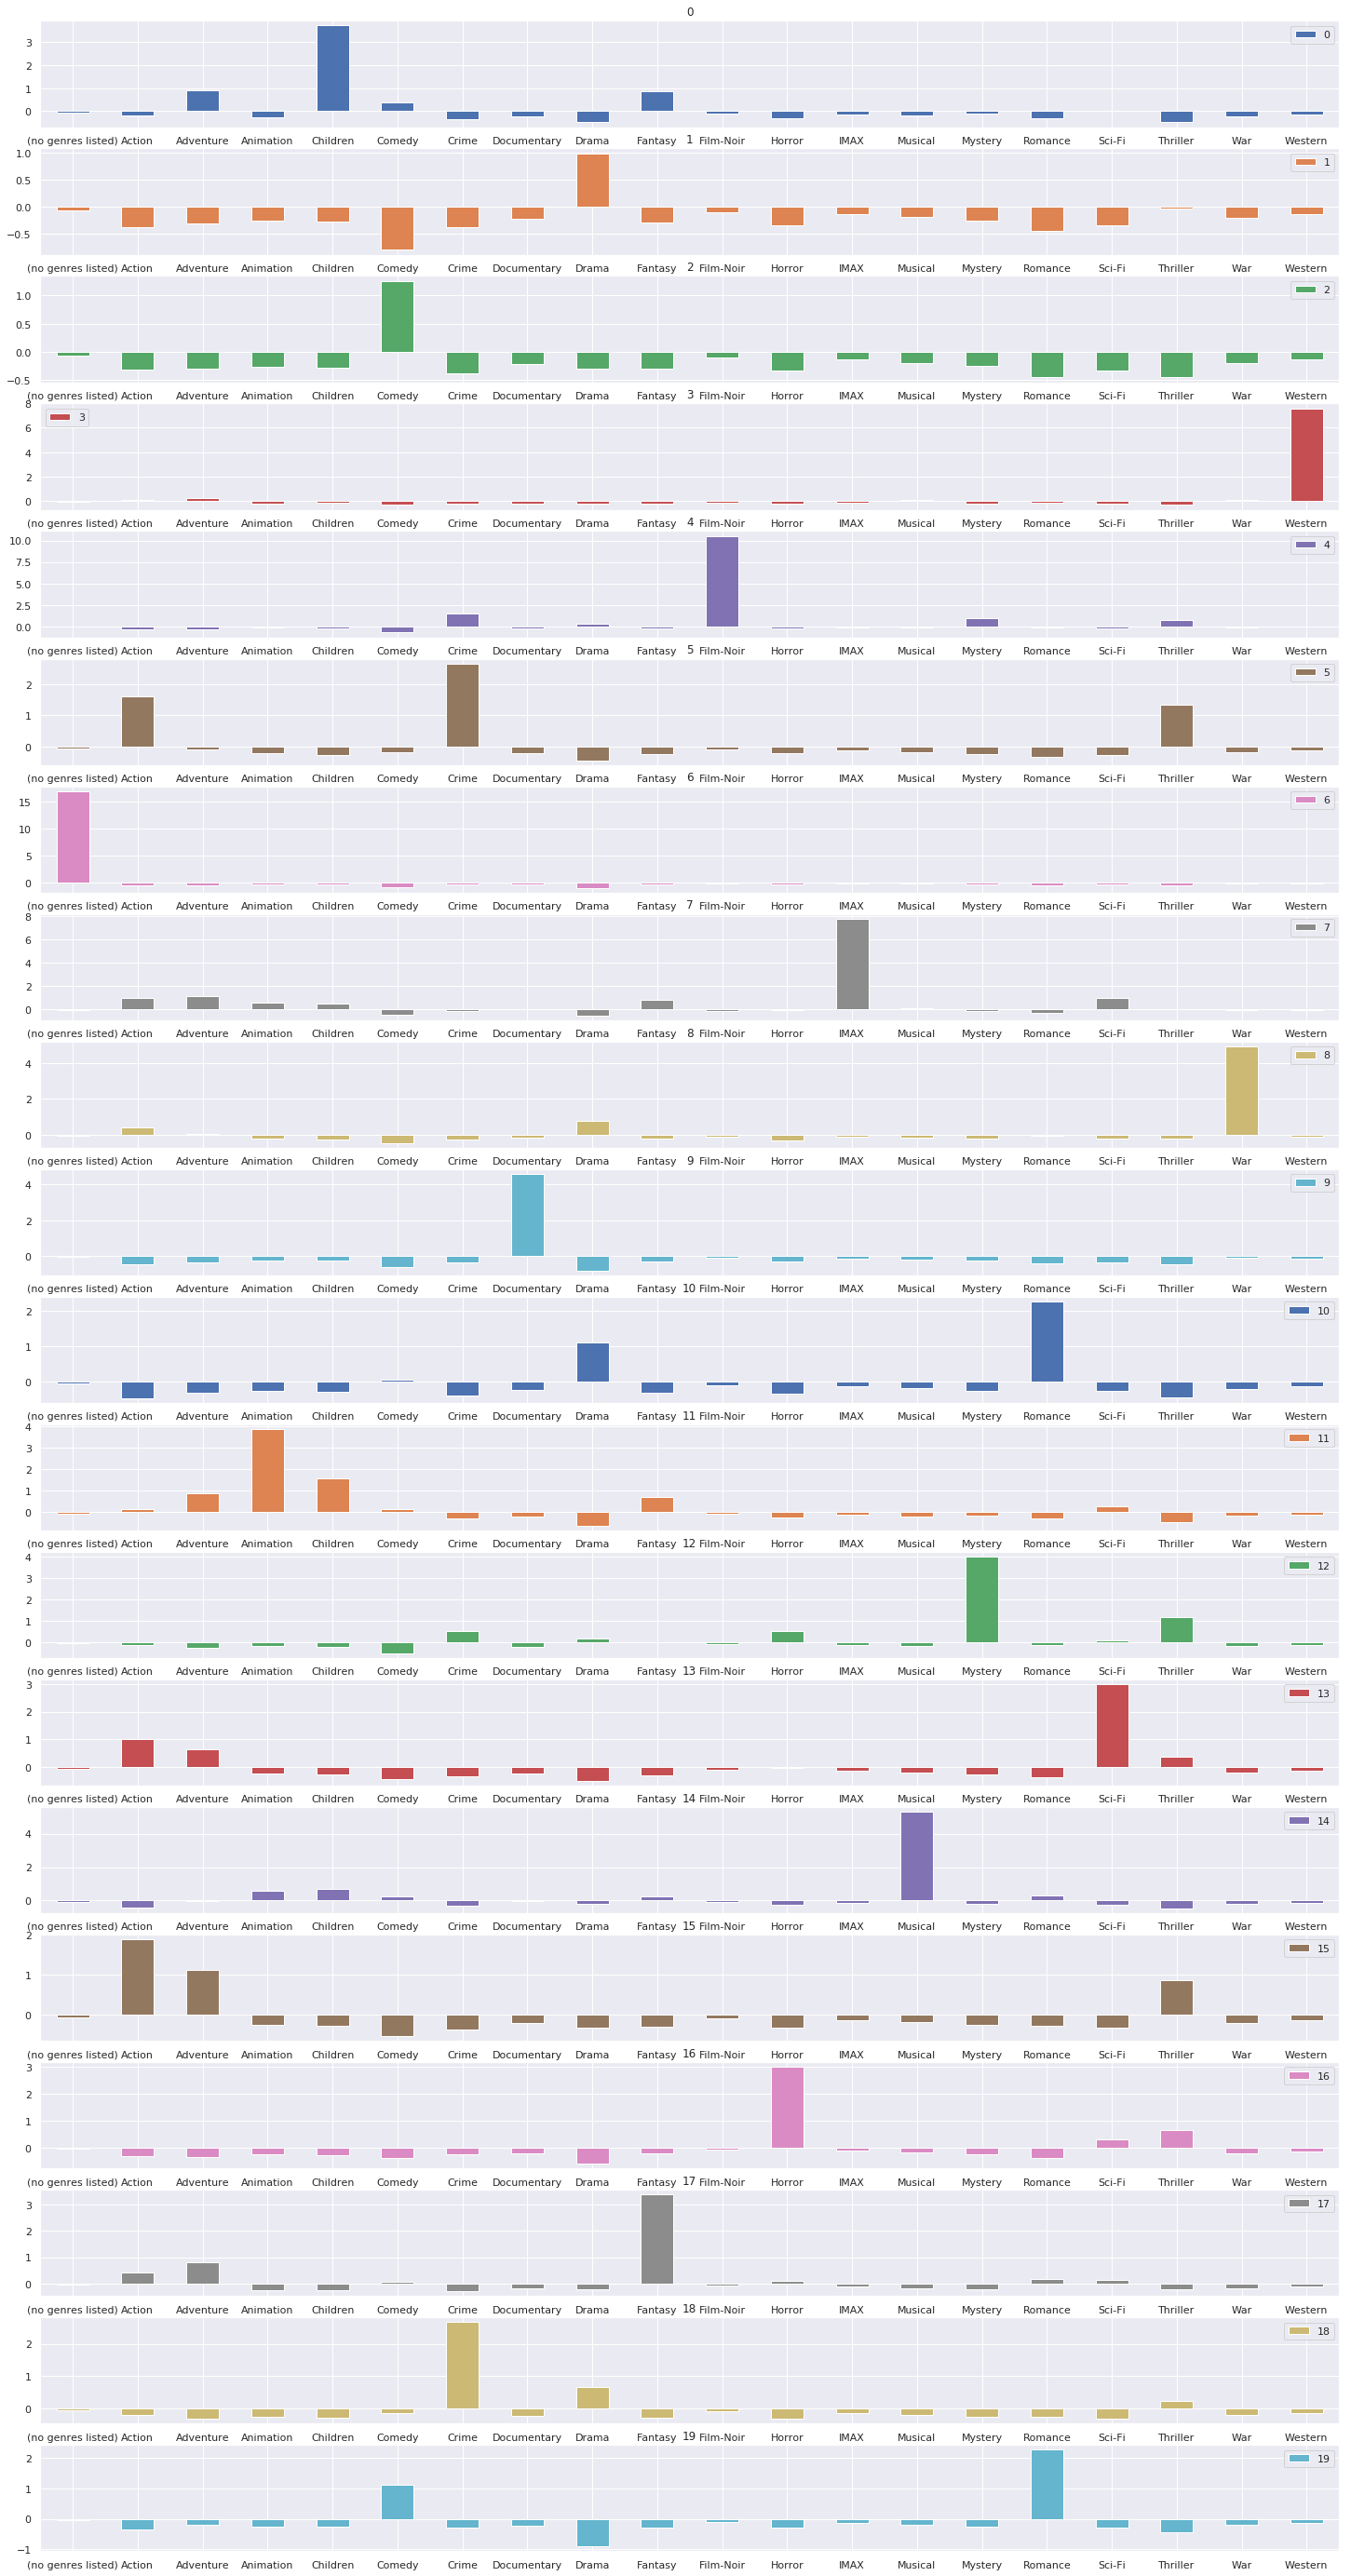

In [0]:
modelo = KMeans(n_clusters = 16)
modelo.fit(generos_escalados)

gruposKMeans2 = pd.DataFrame(modeloKMeans.cluster_centers_,
            columns=generos_df.columns)
gruposKMeans2.transpose().plot.bar(subplots=True,
                                 figsize=(25, 50),
                                 sharex=False,
                                 rot=0)

In [0]:
grupo2 = 0
filtro2 = modelo.labels_ == grupo2

dados_dos_filmes[filtro2].sample(10)

,id_filme,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1238,1647,Playing God (1997),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2709,3634,Seven Days in May (1964),Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2677,3584,Breathless (1983),Action|Drama|Romance|Thriller,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
661,866,Bound (1996),Crime|Drama|Romance|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
5895,33437,Unleashed (Danny the Dog) (2005),Action|Crime|Drama|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1687,2268,"Few Good Men, A (1992)",Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7727,90528,This Must Be the Place (2011),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7405,80126,"American, The (2010)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2475,3298,Boiler Room (2000),Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1660,2227,"Lodger: A Story of the London Fog, The (1927)",Crime|Drama|Thriller,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
modelo = AgglomerativeClustering(n_clusters = 17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [0]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 19.993633  ,  13.723728  ],
       [-21.899416  , -53.122467  ],
       [-20.782566  , -25.31603   ],
       ...,
       [ -0.46318874,  -4.693401  ],
       [-32.27644   ,  32.257736  ],
       [ -2.5646002 ,  26.6487    ]], dtype=float32)

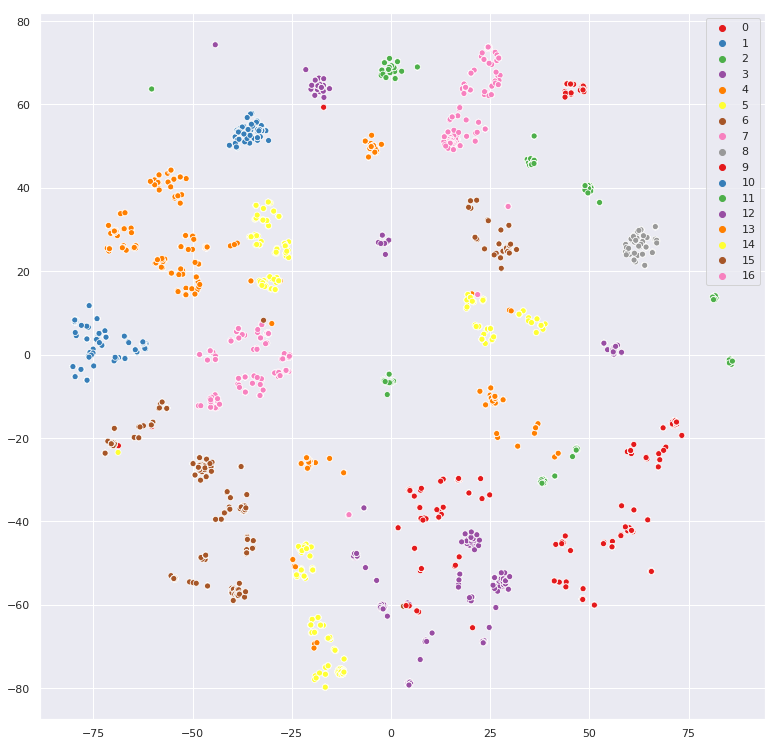

In [0]:
sns.scatterplot(x=visualizacao[:,0],
               y=visualizacao[:,1],
               hue=grupos,
               palette=sns.color_palette('Set1', 17))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b030e4e10>,
      dtype=object)

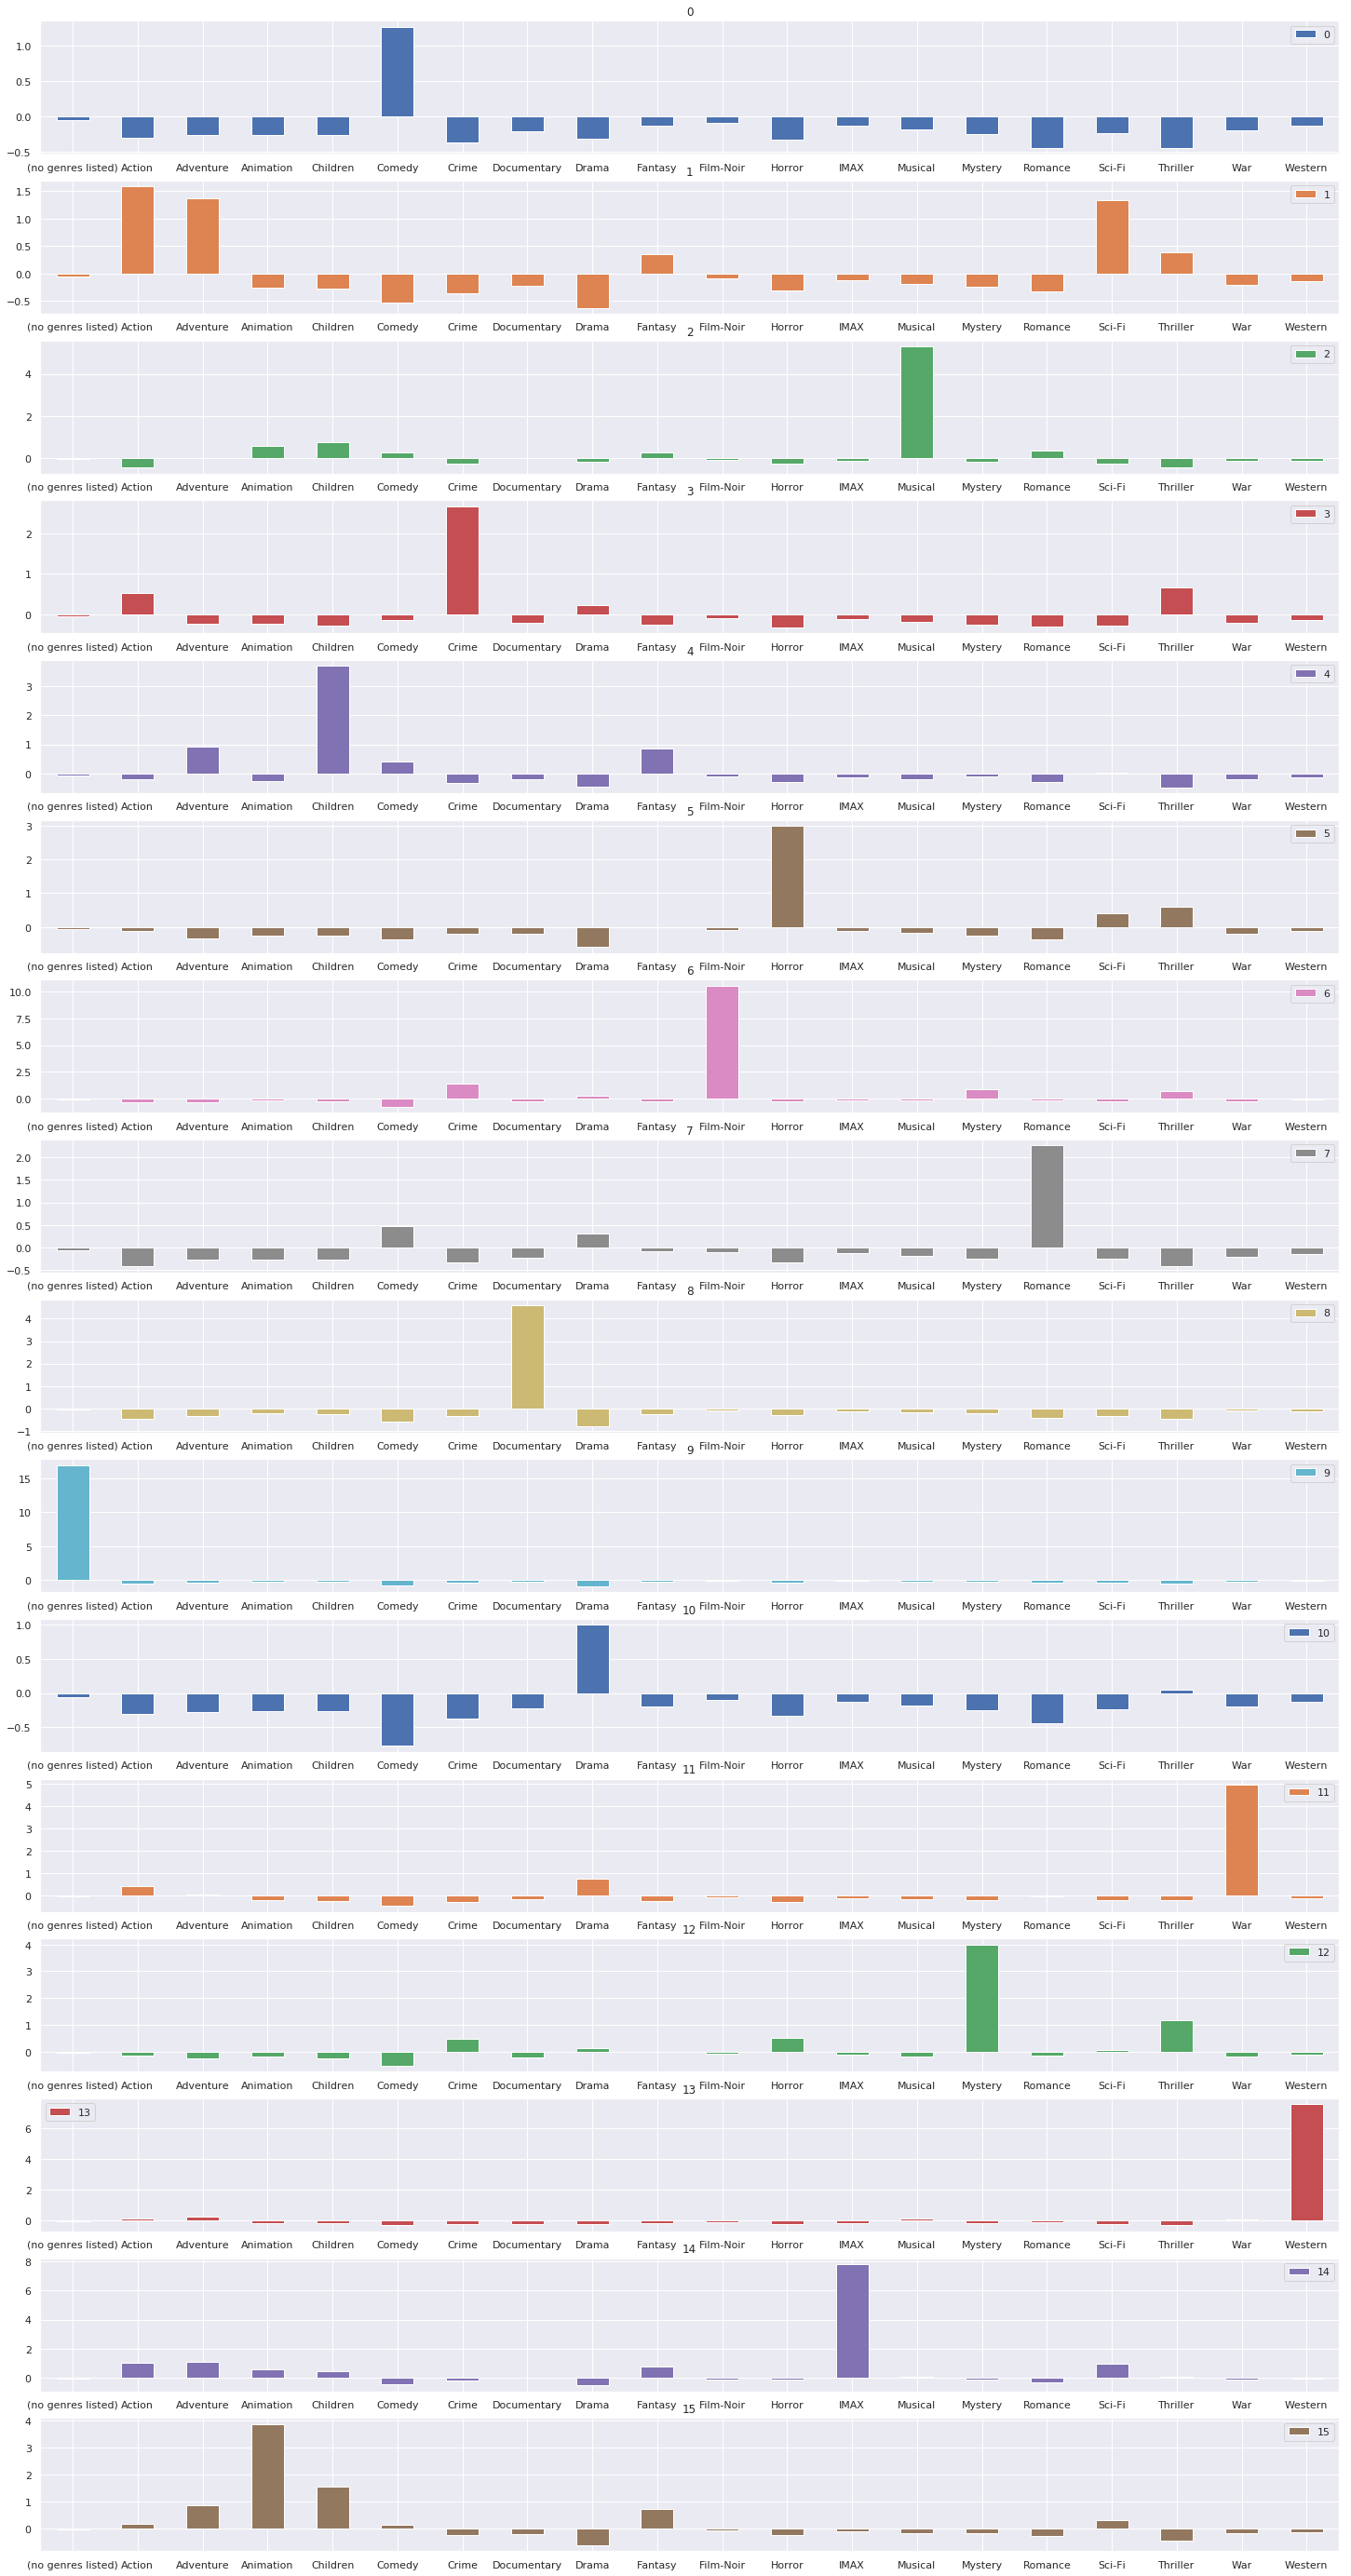

In [0]:
modeloKMeans = KMeans(n_clusters=16)

modeloKMeans.fit(generos_escalados)

gruposKMeans = pd.DataFrame(modeloKMeans.cluster_centers_,
            columns=generos_df.columns)

gruposKMeans.transpose().plot.bar(subplots=True,
                                 figsize=(25, 50),
                                 sharex=False,
                                 rot=0)

In [0]:
matriz_de_distancia = linkage(gruposKMeans)
matriz_de_distancia

array([[ 0.        , 10.        ,  2.47945149,  2.        ],
       [ 7.        , 16.        ,  2.88883762,  3.        ],
       [ 3.        , 17.        ,  3.36728426,  4.        ],
       [ 1.        , 18.        ,  3.4375032 ,  5.        ],
       [ 5.        , 19.        ,  3.82023716,  6.        ],
       [ 4.        , 20.        ,  4.35914968,  7.        ],
       [12.        , 21.        ,  4.67106214,  8.        ],
       [15.        , 22.        ,  4.69237742,  9.        ],
       [ 8.        , 23.        ,  5.17950999, 10.        ],
       [11.        , 24.        ,  5.24588865, 11.        ],
       [ 2.        , 25.        ,  5.81247408, 12.        ],
       [13.        , 26.        ,  7.8702881 , 13.        ],
       [14.        , 27.        ,  8.0702059 , 14.        ],
       [ 6.        , 28.        , 10.81689921, 15.        ],
       [ 9.        , 29.        , 17.07315725, 16.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.4794514864056354, 2.4794514864056354, 0.0],
  [0.0, 2.8888376186677585, 2.8888376186677585, 2.4794514864056354],
  [0.0, 3.3672842643165537, 3.3672842643165537, 2.8888376186677585],
  [0.0, 3.4375032041773226, 3.4375032041773226, 3.3672842643165537],
  [0.0, 3.820237161387979, 3.820237161387979, 3.4375032041773226],
  [0.0, 4.359149676778363, 4.359149676778363, 3.820237161387979],
  [0.0, 4.671062138118838, 4.671062138118838, 4.359149676778363],
  [0.0, 4.692377419826771, 4.692377419826771, 4.671062138118838],
  [0.0, 5.179509994348156, 5.179509994348156, 4.692377419826771],
  [0.0, 5.245888650129025, 5.245888650129025, 5.179509994348156],
  [0.0, 5.812474082466897, 5.812474082466897, 5.245888650129025],
  [0.0, 7.870288102267407, 7.870288102267407, 5.812474082466897],
  [0.0, 8.070205902148855, 8.070205902148855, 7.870288102267407],
  [0.0, 10.816

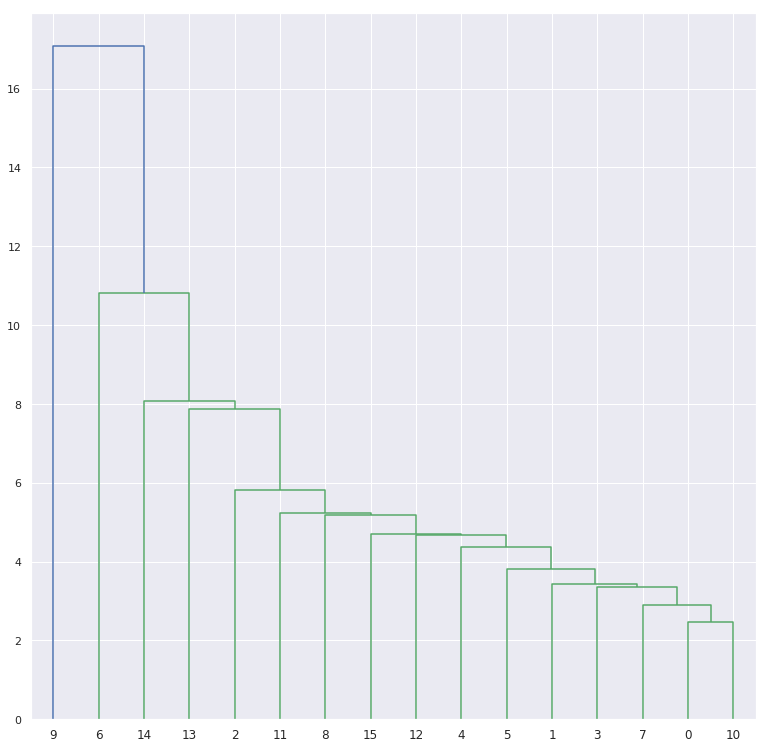

In [0]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma